In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.interpolate import make_interp_spline, BSpline

data = pd.read_csv('../data/reports/details/DBA_2J-mapped_200_2_20_all.csv', names=['Chr','Type','Size'], header=None).sort_values(by=['Size'])

size_bps = [50,100,1000,10000,100000,1000000,20000000]

all_boxes = [15,30,35,40]
for idx, val in enumerate(size_bps):
    if idx==0:
        continue
    else: 
        all_boxes.extend(np.linspace(size_bps[idx-1], val, num=10, endpoint=False, dtype = int))

data['SizeBin'] = pd.cut(x=data['Size'], bins=all_boxes)
grouped_data=data.groupby(["SizeBin","Type"])["SizeBin"].count().unstack("Type").fillna(0)
grouped_data["TOTAL"] = grouped_data.sum(axis=1)


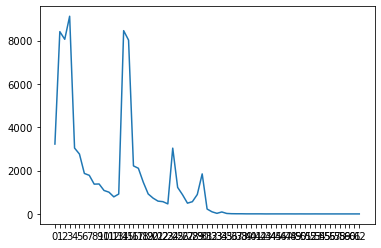

In [22]:
x=[]
for interval in grouped_data['TOTAL'].index.array:
    x.append(interval.left)

y=np.array(grouped_data['TOTAL'].values)
x_l=np.array(x)
x=x_new = np.linspace(1, 4, 300)

plt.plot(y)
plt.xticks(ticks=list(range(len(x_l))))
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'values'